In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [2]:
#signals = ["E:/das/2021-11-30_Medidas/signals1.json"]
signals = ["E:/das/2021-11-30_Medidas/se1.json"]

#load every json file in signals and concatenate data
data = []
for signal in signals:
    with open(signal) as f:
        data.extend(json.load(f))

print(len(data))   
    
#foreach row get signal as 2d array
signals = []
vids = []
ds = []
for row in data:
    signal = np.array(row['Signal'])
    vid = row['VehicleID']
    d = row['Distance']
    if signal.shape[0] != 300:
        pass
    vids.append(vid)
    signals.append(signal)
    ds.append(d)

shapes = {arr.shape for arr in signals}
signals = np.stack(signals)


7824


In [3]:
#pring signals shape
print(signals.shape)
#remove signals with are proximun in distance and time


#remove signals with less than 1 of theis abs of axis 1
signalsf = signals[np.abs(signals).sum(axis=1) > 50]

print (signalsf.shape)

(7824, 400)
(1306, 400)


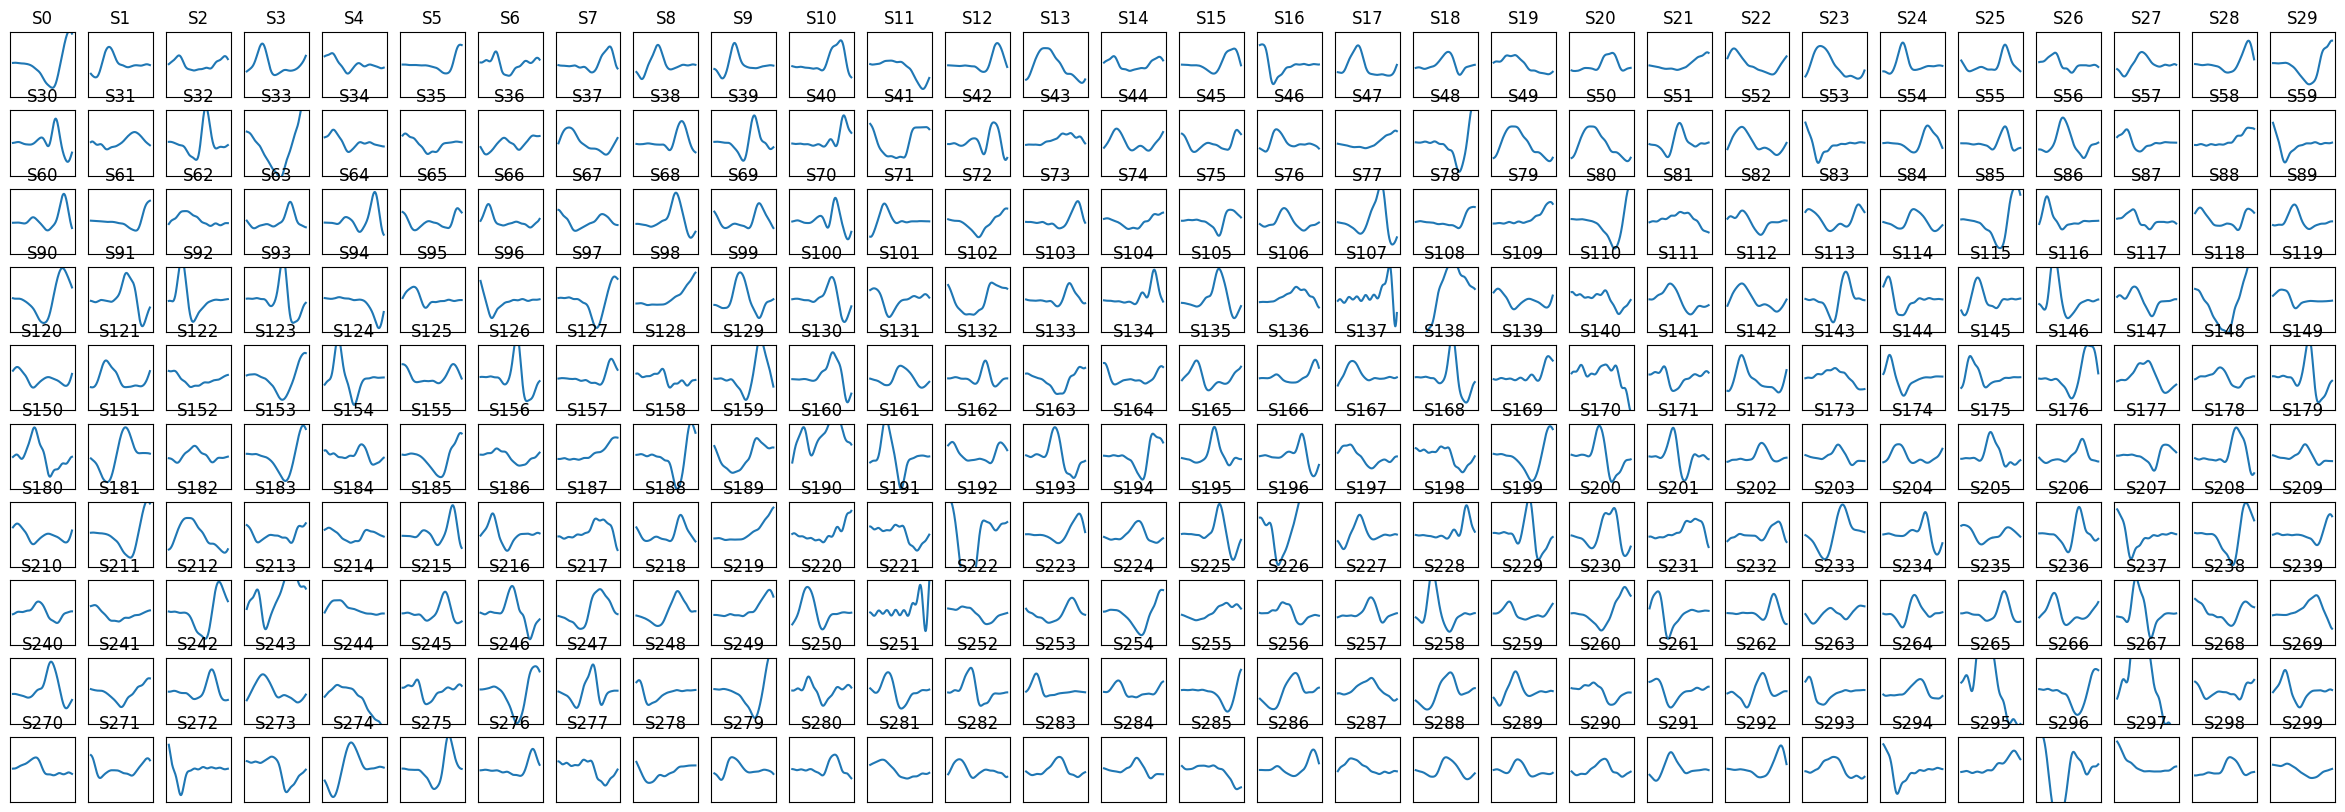

In [4]:
#plot 300 random signals
#np.random.seed(42)
random = np.random.randint(0, signalsf.shape[0], 300)
fig, axs = plt.subplots(10, 30, figsize=(30, 10))
for i, ax in enumerate(axs.flatten()):
    ax.plot(signalsf[random[i]])    
    ax.set_title(f"S{i}")
    ax.set_xticks([])
    ax.set_yticks([])
    #set y axis range
    ax.set_ylim(-1, 1)
plt.show()







(7824, 400)
(14, 2)


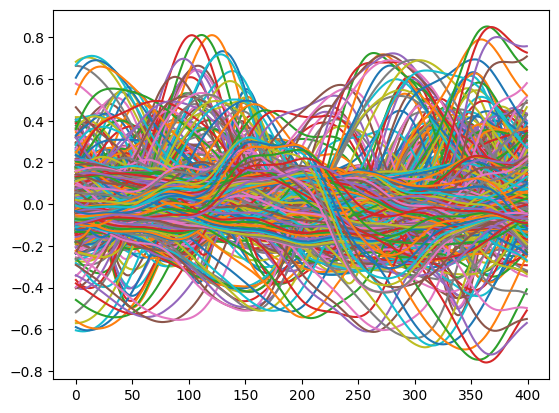

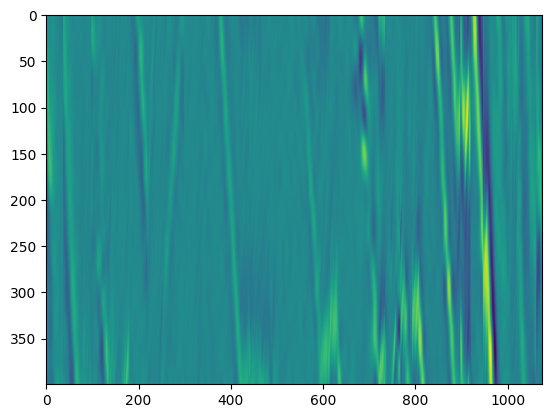

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (1075, 300) and arg 2 with shape (1075, 400).

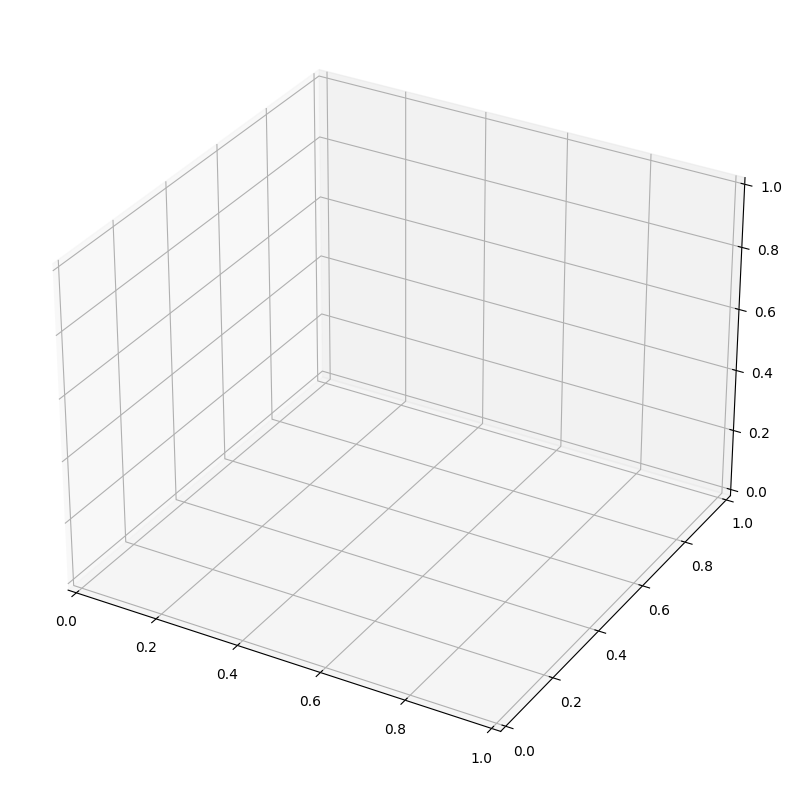

In [13]:
print(signals.shape)
#get ranges of vehicles ids equal
ranges = []
for i in range(len(vids)):
    if i == 0:
        ranges.append([i, i])
    else:
        if vids[i] == vids[i-1]:
            ranges[-1][1] = i
        else:
            ranges.append([i, i])
ranges = np.array(ranges)
print(ranges.shape)
ranges

#plot the signal of first range
plt.plot(signals[ranges[0][0]:ranges[0][1]].T)
plt.show()

#surface plot of first range
plt.imshow(signals[ranges[0][0]:ranges[0][1]].T, aspect='auto')
plt.show()

#plot the image as a 3d heigh map
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 300)
y = np.arange(0, ranges[0][1]-ranges[0][0])
X, Y = np.meshgrid(x, y)
Z = signals[ranges[0][0]:ranges[0][1]]
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()







In [6]:
#get the signals of the first range
signals1 = signals[ranges[0][0]:ranges[0][1]]
print(signals1.shape)


(1075, 400)


Calculating PHATE...
  Running PHATE on 1075 observations and 400 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.10 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.27 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 1.33 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.07 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.52 seconds.
Calculated PHATE in 2.19 seconds.
(1075, 2)


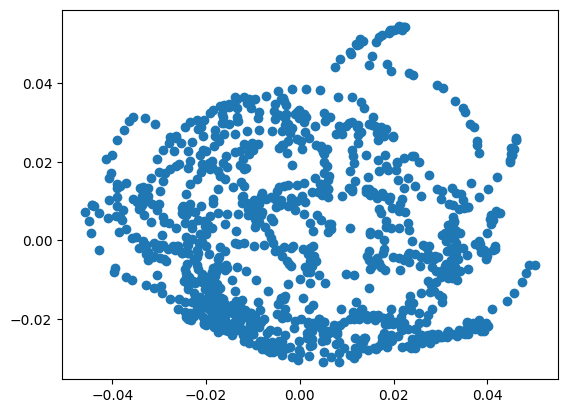

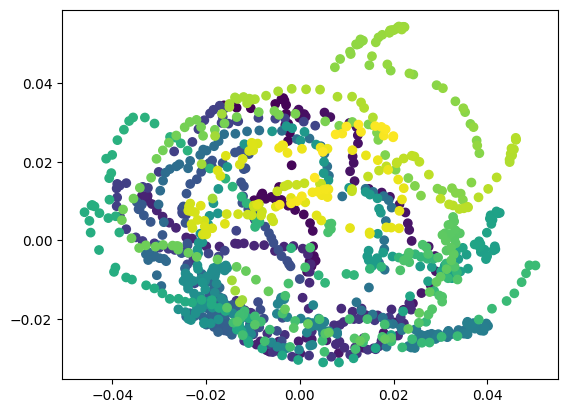

In [7]:
#apply phate clustering to signals 1
from phate import PHATE
phate = PHATE(n_components=2)
signals1_phate = phate.fit_transform(signals1)
print(signals1_phate.shape)

#plot the signals 1 phate
plt.scatter(signals1_phate[:, 0], signals1_phate[:, 1])
plt.show()

#plot the signals 1 phate with color
plt.scatter(signals1_phate[:, 0], signals1_phate[:, 1], c=np.arange(signals1_phate.shape[0]))
plt.show()




In [8]:
#construimos un dataframe from signals agrupando por vehicle id
df = pd.DataFrame(signals)
df['vid'] = vids
df['d'] = ds
df = df.groupby('vid').mean()
df = df.reset_index()
df.head()



,vid,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,d
0,231f6c07-58d2-428a-97d8-1cf27600745f,0.002237,0.001894,0.001550,0.001178,0.000812,0.000416,0.000029,-0.000351,-0.000701,...,0.031178,0.031007,0.030833,0.030632,0.030422,0.030233,0.030078,0.029896,0.029683,565.5
1,5c8fd292-497e-4970-9cb9-de9989845e2a,0.024756,0.024075,0.023322,0.022514,0.021574,0.020619,0.019592,0.018530,0.017426,...,0.042650,0.042934,0.043174,0.043348,0.043509,0.043599,0.043641,0.043626,0.043500,1064.0
2,6690e7cb-cb7e-4700-80bd-552a9ba3a3cf,-0.033193,-0.033318,-0.033383,-0.033340,-0.033204,-0.032984,-0.032754,-0.032365,-0.031916,...,0.023186,0.021840,0.020564,0.019278,0.018135,0.017027,0.016050,0.015218,0.014343,1119.0
3,7518958c-b963-4db2-bee6-8ae1fc14b50e,0.003021,0.003207,0.003395,0.003545,0.003701,0.003813,0.003928,0.004041,0.004168,...,0.015092,0.015000,0.014911,0.014791,0.014659,0.014552,0.014472,0.014360,0.014227,528.5
4,7ea4fa97-e9e8-4114-8445-b24bb49e9e5e,-0.001434,-0.001398,-0.001376,-0.001386,-0.001394,-0.001435,-0.001484,-0.001524,-0.001524,...,0.007834,0.007822,0.007827,0.007818,0.007785,0.007779,0.007826,0.007834,0.007806,533.5
